In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
label = pd.read_csv("train/label_train.csv")
sift_feature = pd.read_csv("train/SIFT_train.csv", header = None)
rgb_feature = pd.read_csv("rgb_feature.csv")
gist_feature= pd.read_csv("gist_feature.csv", header = None)

# sift + linear svm

In [3]:
y = label[[2]]
y = np.array(y).reshape(y.shape[0],)
print(y.shape)

X_sift = sift_feature.drop([0], axis=1)
print(X_sift.shape)
X_sift_train, X_sift_test, y_train, y_test = train_test_split(X_sift, y, random_state=0, stratify=y)

(3000,)
(3000, 2000)


In [88]:
param_grid1 = {'C': np.logspace(-2, 2, 5)}
grid1 = GridSearchCV(LinearSVC(), param_grid=param_grid1, cv=3)
grid1.fit(X_sift_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
print("best parameters: {}".format(grid1.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid1.best_score_))

best parameters: {'C': 100.0}
best mean cross-validation score: 0.724


In [90]:
tick = time()
siftsvm = LinearSVC(C=100).fit(X_sift_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(siftsvm.score(X_sift_test, y_test)))

running time: 4.783
test score: 0.715


In [91]:
res1 = pd.DataFrame(grid1.cv_results_)
res1.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.072965,0.003724,0.608889,0.681778,0.01,{'C': 0.01},5,0.597333,0.678667,0.629333,0.686667,0.600000,0.680000,0.011349,0.000489,0.014497,0.003500
1,0.071089,0.003432,0.612889,0.686889,0.1,{'C': 0.1},4,0.600000,0.682000,0.630667,0.690667,0.608000,0.688000,0.001248,0.000448,0.012988,0.003624
2,0.148705,0.003464,0.637778,0.725333,1,{'C': 1.0},3,0.634667,0.719333,0.641333,0.732000,0.637333,0.724667,0.007888,0.000362,0.002740,0.005193
3,0.773785,0.003312,0.696889,0.859333,10,{'C': 10.0},2,0.676000,0.859333,0.720000,0.857333,0.694667,0.861333,0.086874,0.000255,0.018032,0.001633
4,2.804458,0.003649,0.724000,0.978444,100,{'C': 100.0},1,0.716000,0.978667,0.729333,0.977333,0.726667,0.979333,0.064650,0.000469,0.005761,0.000831


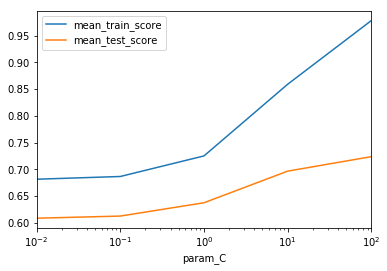

In [92]:
res1.plot('param_C', 'mean_train_score')
res1.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.xscale('log')
plt.legend()
plt.show()

# sift + non-linear svm (rbf)

In [ ]:
param_grid2 = {'C': np.logspace(-2, 2, 5),
              'gamma': np.logspace(-2, 2, 5)}
grid2 = GridSearchCV(SVC(), param_grid=param_grid2, cv=3)
grid2.fit(X_sift_train, y_train)

In [93]:
print("best parameters: {}".format(grid2.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))

best parameters: {'gamma': 100.0, 'C': 10.0}
best mean cross-validation score: 0.756


In [94]:
tick = time()
siftsvmrbf = SVC(C=10, gamma=100).fit(X_sift_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(siftsvmrbf.score(X_sift_test, y_test)))

running time: 14.903
test score: 0.772


In [95]:
res2 = pd.DataFrame(grid2.cv_results_)
res2.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.640956,2.326617,0.379111,0.394889,0.01,0.01,"{'gamma': 0.01, 'C': 0.01}",21,0.408000,0.415333,0.381333,0.405333,0.348000,0.364000,0.315549,0.105508,0.024545,0.022220
1,6.231321,2.269120,0.384889,0.401333,0.01,0.1,"{'gamma': 0.1, 'C': 0.01}",18,0.417333,0.430667,0.390667,0.409333,0.346667,0.364000,0.095364,0.028778,0.029137,0.027798
2,6.428480,2.393677,0.426222,0.436000,0.01,1,"{'gamma': 1.0, 'C': 0.01}",13,0.457333,0.454667,0.464000,0.477333,0.357333,0.376000,0.180167,0.118784,0.048788,0.043424
3,6.933342,2.350589,0.393333,0.418000,0.01,10,"{'gamma': 10.0, 'C': 0.01}",16,0.425333,0.452000,0.369333,0.383333,0.385333,0.418667,0.363005,0.061245,0.023551,0.028037
4,6.621438,2.436394,0.516000,0.539111,0.01,100,"{'gamma': 100.0, 'C': 0.01}",11,0.524000,0.542667,0.510667,0.526000,0.513333,0.548667,0.472853,0.211555,0.005761,0.009589


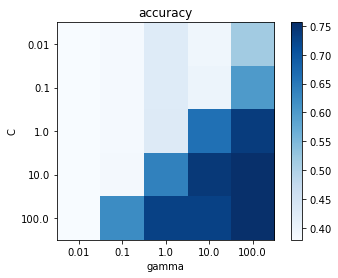

In [108]:
plt.title("accuracy")
plt.imshow(res2.mean_test_score.values.reshape(5, 5), cmap=plt.cm.Blues)
plt.yticks(range(len(param_grid2['C'])), param_grid2['C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid2['gamma'])), param_grid2['gamma'])
plt.xlabel("gamma")
plt.colorbar()
plt.show()

# rgb + linear svm

In [109]:
X_rgb = rgb_feature.drop(['Unnamed: 0'], axis=1)
print(X_rgb.shape)
X_rgb_train, X_rgb_test, y_train, y_test = train_test_split(X_rgb, y, random_state=0, stratify=y)

(3000, 1440)


In [110]:
param_grid3 = {'C': np.logspace(-2, 2, 5)}
grid3 = GridSearchCV(LinearSVC(), param_grid=param_grid3, cv=3)
grid3.fit(X_rgb_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [111]:
print("best parameters: {}".format(grid3.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))

best parameters: {'C': 100.0}
best mean cross-validation score: 0.725


In [112]:
tick = time()
rgbsvm = LinearSVC(C=100).fit(X_rgb_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(rgbsvm.score(X_rgb_test, y_test)))

running time: 4.242
test score: 0.717


In [113]:
res3 = pd.DataFrame(grid3.cv_results_)
res3.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.089676,0.006400,0.554667,0.565778,0.01,{'C': 0.01},5,0.572000,0.568667,0.542667,0.559333,0.549333,0.569333,0.027449,0.000485,0.012555,0.004565
1,0.069955,0.006210,0.628000,0.641778,0.1,{'C': 0.1},4,0.638667,0.642000,0.630667,0.632000,0.614667,0.651333,0.000779,0.000326,0.009978,0.007894
2,0.195013,0.008056,0.684444,0.708667,1,{'C': 1.0},3,0.705333,0.692000,0.681333,0.718667,0.666667,0.715333,0.026798,0.001575,0.015938,0.011863
3,1.091909,0.006016,0.704444,0.764444,10,{'C': 10.0},2,0.722667,0.751333,0.704000,0.769333,0.686667,0.772667,0.143481,0.000318,0.014700,0.009370
4,2.787729,0.006175,0.725333,0.823333,100,{'C': 100.0},1,0.746667,0.820667,0.730667,0.820667,0.698667,0.828667,0.246919,0.000552,0.019956,0.003771


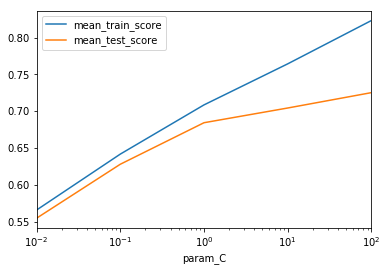

In [114]:
res3.plot('param_C', 'mean_train_score')
res3.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.xscale('log')
plt.legend()
plt.show()

# rgb + non-linear svm (rbf)

In [ ]:
param_grid4 = {'C': np.logspace(-2, 2, 5),
              'gamma': np.logspace(-2, 2, 5)}
grid4 = GridSearchCV(SVC(), param_grid=param_grid4, cv=3)
grid4.fit(X_rgb_train, y_train)

In [115]:
print("best parameters: {}".format(grid4.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid4.best_score_))

best parameters: {'gamma': 1.0, 'C': 100.0}
best mean cross-validation score: 0.756


In [116]:
tick = time()
rgbsvmrbf = SVC(C=100, gamma=1).fit(X_rgb_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(rgbsvmrbf.score(X_rgb_test, y_test)))

running time: 4.995
test score: 0.756


In [117]:
res4 = pd.DataFrame(grid4.cv_results_)
res4.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,5.028390,1.776738,0.425778,0.426222,0.01,0.01,"{'gamma': 0.01, 'C': 0.01}",21,0.434667,0.428000,0.428000,0.434000,0.414667,0.416667,0.190930,0.125076,0.008315,0.007187
1,4.922726,1.764611,0.425778,0.426000,0.01,0.1,"{'gamma': 0.1, 'C': 0.01}",21,0.432000,0.427333,0.429333,0.434000,0.416000,0.416667,0.109907,0.121377,0.006999,0.007139
2,5.303769,1.767397,0.429333,0.431333,0.01,1,"{'gamma': 1.0, 'C': 0.01}",20,0.434667,0.427333,0.429333,0.436667,0.424000,0.430000,0.307108,0.011833,0.004355,0.003925
3,4.849829,1.808357,0.548444,0.550444,0.01,10,"{'gamma': 10.0, 'C': 0.01}",15,0.561333,0.532667,0.541333,0.552667,0.542667,0.566000,0.280658,0.149976,0.009130,0.013699
4,4.726228,1.712716,0.491111,0.500444,0.01,100,"{'gamma': 100.0, 'C': 0.01}",16,0.500000,0.508000,0.484000,0.487333,0.489333,0.506000,0.203181,0.134313,0.006652,0.009307


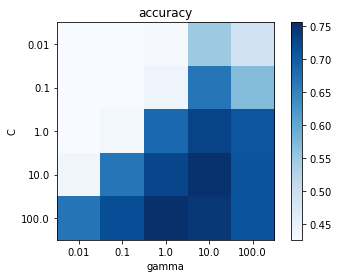

In [118]:
plt.title("accuracy")
plt.imshow(res4.mean_test_score.values.reshape(5, 5), cmap=plt.cm.Blues)
plt.yticks(range(len(param_grid4['C'])), param_grid4['C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid4['gamma'])), param_grid4['gamma'])
plt.xlabel("gamma")
plt.colorbar()
plt.show()

# gist + linear svm

In [119]:
X_gist = gist_feature
print(X_gist.shape)
X_gist_train, X_gist_test, y_train, y_test = train_test_split(X_gist, y, random_state=0, stratify=y)

(3000, 512)


In [120]:
param_grid5 = {'C': np.logspace(-2, 2, 5)}
grid5 = GridSearchCV(LinearSVC(), param_grid=param_grid5, cv=3)
grid5.fit(X_gist_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [121]:
print("best parameters: {}".format(grid5.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid5.best_score_))

best parameters: {'C': 1.0}
best mean cross-validation score: 0.732


In [122]:
tick = time()
gistsvm = LinearSVC(C=1).fit(X_gist_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(gistsvm.score(X_gist_test, y_test)))

running time: 0.720
test score: 0.759


In [123]:
res5 = pd.DataFrame(grid5.cv_results_)
res5.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.079280,0.002019,0.657778,0.675333,0.01,{'C': 0.01},5,0.662667,0.666000,0.646667,0.682,0.664000,0.678000,0.015581,0.000743,0.007876,0.006799
1,0.106808,0.001057,0.707556,0.738444,0.1,{'C': 0.1},3,0.709333,0.740667,0.702667,0.740,0.710667,0.734667,0.010436,0.000022,0.003500,0.002685
2,0.385108,0.001448,0.731556,0.790222,1,{'C': 1.0},1,0.717333,0.794667,0.728000,0.786,0.749333,0.790000,0.014935,0.000245,0.013304,0.003542
3,3.702139,0.001772,0.720444,0.845333,10,{'C': 10.0},2,0.728000,0.850000,0.712000,0.842,0.721333,0.844000,0.270431,0.000472,0.006562,0.003399
4,4.122428,0.001365,0.696889,0.902000,100,{'C': 100.0},4,0.689333,0.899333,0.696000,0.906,0.705333,0.900667,0.257018,0.000170,0.006562,0.002880


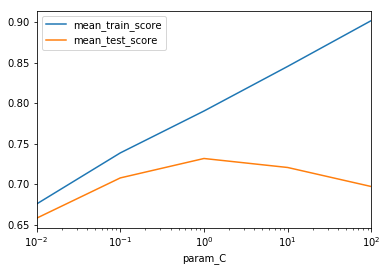

In [124]:
res5.plot('param_C', 'mean_train_score')
res5.plot('param_C', 'mean_test_score', ax=plt.gca())
plt.xscale('log')
plt.legend()
plt.show()

# gist + non-linear svm (rbf)

In [ ]:
param_grid6 = {'C': np.logspace(-2, 2, 5),
              'gamma': np.logspace(-2, 2, 5)}
grid6 = GridSearchCV(SVC(), param_grid=param_grid6, cv=3)
grid6.fit(X_gist_train, y_train)

In [125]:
print("best parameters: {}".format(grid6.best_params_))
print("best mean cross-validation score: {:.3f}".format(grid6.best_score_))

best parameters: {'gamma': 10.0, 'C': 10.0}
best mean cross-validation score: 0.736


In [126]:
tick = time()
gistsvmrbf = SVC(C=10, gamma=10).fit(X_gist_train,y_train)
print("running time: {:.3f}".format(time() - tick))
print("test score: {:.3f}".format(gistsvmrbf.score(X_gist_test, y_test)))

running time: 4.021
test score: 0.756


In [127]:
res6 = pd.DataFrame(grid6.cv_results_)
res6.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.860465,0.657681,0.605333,0.617778,0.01,0.01,"{'gamma': 0.01, 'C': 0.01}",16,0.606667,0.608000,0.602667,0.622000,0.606667,0.623333,0.074917,0.024886,0.001886,0.006935
1,1.844031,0.613625,0.605333,0.617778,0.01,0.1,"{'gamma': 0.1, 'C': 0.01}",16,0.602667,0.610000,0.605333,0.621333,0.608000,0.622000,0.058793,0.035245,0.002177,0.005506
2,1.806977,0.623865,0.603111,0.620667,0.01,1,"{'gamma': 1.0, 'C': 0.01}",19,0.600000,0.614667,0.600000,0.623333,0.609333,0.624000,0.065307,0.009678,0.004400,0.004251
3,1.718978,0.616578,0.586667,0.700000,0.01,10,"{'gamma': 10.0, 'C': 0.01}",20,0.610667,0.712667,0.561333,0.674667,0.588000,0.712667,0.063886,0.018930,0.020162,0.017913
4,1.824837,0.666626,0.338667,1.000000,0.01,100,"{'gamma': 100.0, 'C': 0.01}",24,0.340000,1.000000,0.336000,1.000000,0.340000,1.000000,0.142421,0.069196,0.001886,0.000000


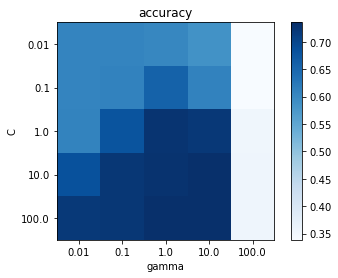

In [130]:
plt.title("accuracy")
plt.imshow(res6.mean_test_score.values.reshape(5, 5), cmap=plt.cm.Blues)
plt.yticks(range(len(param_grid6['C'])), param_grid6['C'])
plt.ylabel("C")
plt.xticks(range(len(param_grid6['gamma'])), param_grid6['gamma'])
plt.xlabel("gamma")
plt.colorbar()
plt.show()